# Stock Market data prediction using Historical Data

## Importing Libraries 

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression,LogisticRegression
import pandas_datareader as web
model = LinearRegression()

## Importing Data 

In [35]:
# data_num = pd.read_csv('djia.csv')
data_num = web.DataReader('^DJI', data_source='yahoo', start='2008-08-08', end='2016-07-01')
data_num.reset_index(level=0, inplace=True)
data_num.tail()


,Date,High,Low,Open,Close,Volume,Adj Close
1985,2016-06-27,17355.210938,17063.080078,17355.210938,17140.240234,1387400,17140.240234
1986,2016-06-28,17409.720703,17190.509766,17190.509766,17409.720703,1121900,17409.720703
1987,2016-06-29,17704.509766,17456.019531,17456.019531,17694.679688,1063800,17694.679688
1988,2016-06-30,17930.609375,17711.800781,17712.759766,17929.990234,1330300,17929.990234
1989,2016-07-01,18002.380859,17916.910156,17924.240234,17949.369141,821600,17949.369141


In [53]:
# data_num = pd.read_csv('djia.csv')
df = web.DataReader('^DJI', data_source='yahoo', start='2008-08-08', end='2016-07-01')
df.reset_index(level=0, inplace=True)
df.tail()


,Date,High,Low,Open,Close,Volume,Adj Close
1985,2016-06-27,17355.210938,17063.080078,17355.210938,17140.240234,1387400,17140.240234
1986,2016-06-28,17409.720703,17190.509766,17190.509766,17409.720703,1121900,17409.720703
1987,2016-06-29,17704.509766,17456.019531,17456.019531,17694.679688,1063800,17694.679688
1988,2016-06-30,17930.609375,17711.800781,17712.759766,17929.990234,1330300,17929.990234
1989,2016-07-01,18002.380859,17916.910156,17924.240234,17949.369141,821600,17949.369141


In [54]:
df.drop(['High','Low','Volume','Adj Close','Date'],axis=1,inplace=True)
df.head()

,Open,Close
0,11655.419922,11431.429688
1,11432.089844,11734.320312
2,11729.669922,11782.349609
3,11781.700195,11642.469727
4,11632.809570,11532.959961


In [55]:
#split into train and validation
train = df[:1200]
valid = df[1200:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [56]:
model.score(x_valid,y_valid)

0.97993103871046

In [57]:
y_pred =model.predict(x_valid)

In [58]:
import numpy as np
rms=np.sqrt(np.mean(np.power((y_valid-y_pred),2)))
rms

135.07277398902167

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10


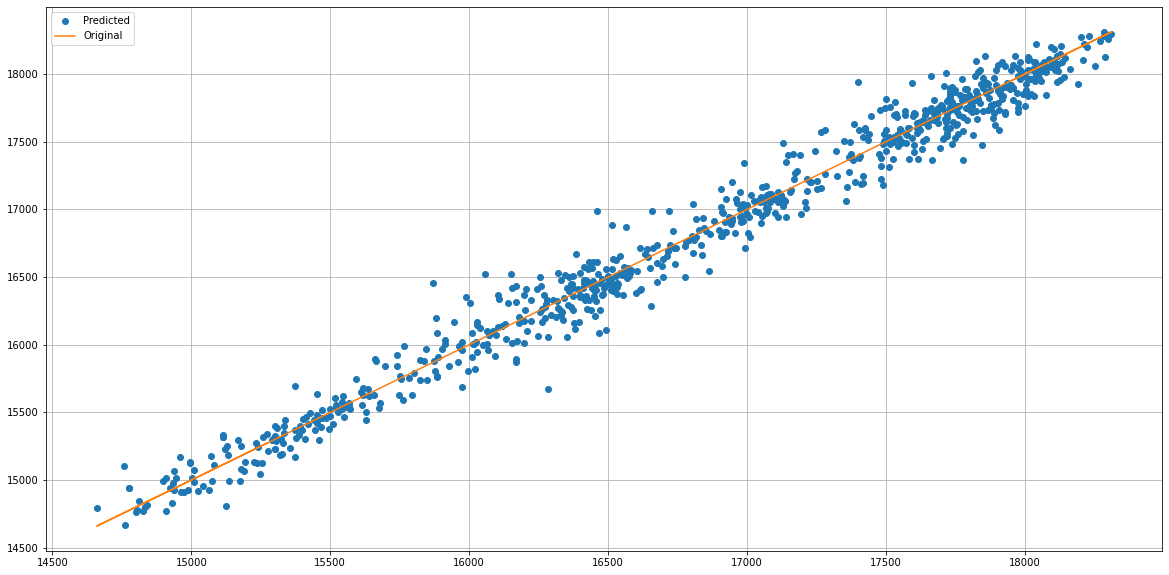

In [86]:
import matplotlib.pyplot as plt
plt.plot(y_valid,y_pred,marker='o',linestyle='',label="Predicted")
plt.plot(y_valid,y_valid, label="Original")

plt.legend(loc='best')
plt.grid()
plt.show()

<ipython-input-46-09f8c6271965>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = y_pred


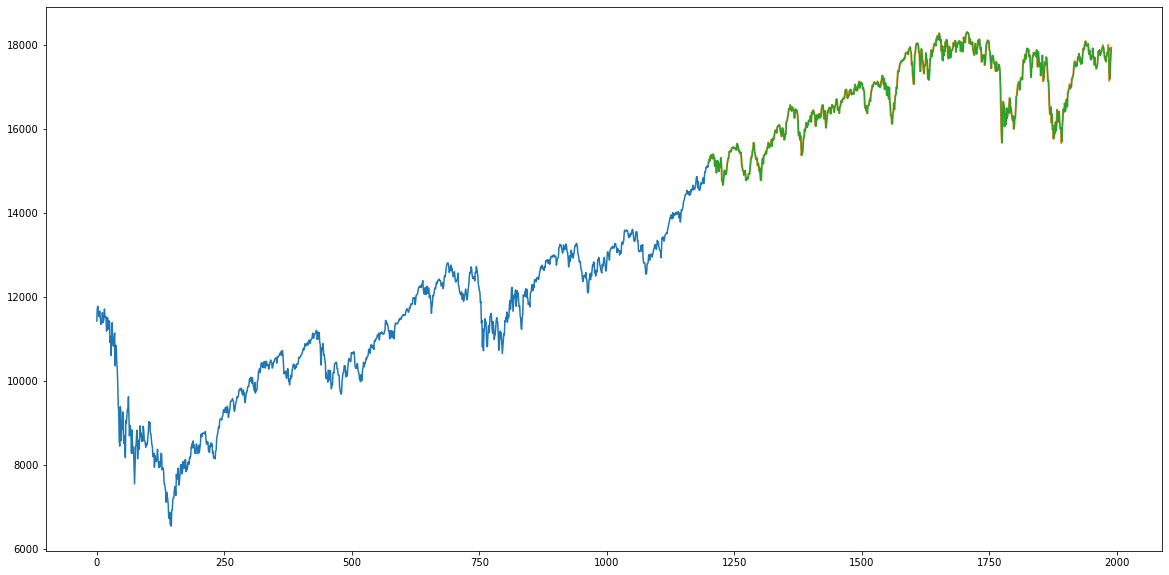

In [46]:
#plot
valid['Predictions'] = y_pred

valid.index = df[1200:].index
train.index = df[:1200].index

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

# Training and Testing for Different Stock (TATA STEEL)

In [60]:
data_num1 = web.DataReader('TATASTEEL.NS', data_source='yahoo', start='2021-01-01', end='2021-01-08')
data_num1.reset_index(level=0, inplace=True)
data_num1.head(6)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2021-01-01,649.700012,640.000000,645,643.099976,8411396,643.099976
1,2021-01-04,699.900024,646.450012,649,693.000000,38184955,693.000000
2,2021-01-05,693.849976,675.099976,687,680.549988,21545254,680.549988
3,2021-01-06,696.650024,675.000000,684,683.799988,19610522,683.799988
4,2021-01-07,731.500000,691.700012,693,722.799988,38232194,722.799988
5,2021-01-08,727.250000,703.099976,727,713.150024,19329313,713.150024


In [61]:
data_num1.drop(['Date','Close','Adj Close','High','Low','Volume'],axis=1,inplace=True)
# data_num1.drop(['Date','Close','Adj Close'],axis=1,inplace=True)
data_num1.head()


,Open
0,645
1,649
2,687
3,684
4,693


In [62]:
# predicted_y = model.predict(data_num1.iloc[0].values.reshape(1,-1))
predicted_y = model.predict(data_num1)

In [63]:
predicted_y

array([662.21874609, 666.21381962, 704.16701809, 701.17071295,
       710.15962838, 744.11775333])

# Predict next day's close price (Experimental)

In [64]:
# data_num = pd.read_csv('djia.csv')
data_num = web.DataReader('TATASTEEL.NS', data_source='yahoo', start='2020-01-01', end='2021-01-08')
data_num.reset_index(level=0, inplace=True)
data_num.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
251,2021-01-04,699.900024,646.450012,649.0,693.000000,38184955.0,693.000000
252,2021-01-05,693.849976,675.099976,687.0,680.549988,21545254.0,680.549988
253,2021-01-06,696.650024,675.000000,684.0,683.799988,19610522.0,683.799988
254,2021-01-07,731.500000,691.700012,693.0,722.799988,38232194.0,722.799988
255,2021-01-08,727.250000,703.099976,727.0,713.150024,19329313.0,713.150024


In [65]:
data_num['NextOpen'] = 0
data_num['NextClose'] = 0

In [66]:
data_num.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,NextOpen,NextClose
251,2021-01-04,699.900024,646.450012,649.0,693.000000,38184955.0,693.000000,0,0
252,2021-01-05,693.849976,675.099976,687.0,680.549988,21545254.0,680.549988,0,0
253,2021-01-06,696.650024,675.000000,684.0,683.799988,19610522.0,683.799988,0,0
254,2021-01-07,731.500000,691.700012,693.0,722.799988,38232194.0,722.799988,0,0
255,2021-01-08,727.250000,703.099976,727.0,713.150024,19329313.0,713.150024,0,0


In [67]:
for i in range(0, len(data_num) - 1):
    data_num.loc[i, 'NextOpen'] = data_num.loc[i+1, 'Open']   
    data_num.loc[i, 'NextClose'] = data_num.loc[i+1, 'Close']


In [68]:
data_num

,Date,High,Low,Open,Close,Volume,Adj Close,NextOpen,NextClose
0,2020-01-01,476.500000,464.799988,473.0,467.750000,12100530.0,455.932159,472.000000,484.850006
1,2020-01-02,487.799988,472.000000,472.0,484.850006,21674961.0,472.600128,483.000000,483.700012
2,2020-01-03,486.200012,479.450012,483.0,483.700012,12956863.0,471.479187,480.000000,473.250000
3,2020-01-06,480.000000,470.549988,480.0,473.250000,9601608.0,461.293213,475.500000,476.100006
4,2020-01-07,484.600006,473.549988,475.5,476.100006,13195788.0,464.071198,471.649994,475.250000
...,...,...,...,...,...,...,...,...,...
251,2021-01-04,699.900024,646.450012,649.0,693.000000,38184955.0,693.000000,687.000000,680.549988
252,2021-01-05,693.849976,675.099976,687.0,680.549988,21545254.0,680.549988,684.000000,683.799988
253,2021-01-06,696.650024,675.000000,684.0,683.799988,19610522.0,683.799988,693.000000,722.799988
254,2021-01-07,731.500000,691.700012,693.0,722.799988,38232194.0,722.799988,727.000000,713.150024


In [73]:
data_num = data_num[:-4]

In [587]:
data_num

,Date,High,Low,Open,Close,Volume,Adj Close,NextOpen,NextClose
0,2020-01-01,476.500000,464.799988,473.000000,467.750000,12100530.0,455.932159,472.000000,484.850006
1,2020-01-02,487.799988,472.000000,472.000000,484.850006,21674961.0,472.600128,483.000000,483.700012
2,2020-01-03,486.200012,479.450012,483.000000,483.700012,12956863.0,471.479187,480.000000,473.250000
3,2020-01-06,480.000000,470.549988,480.000000,473.250000,9601608.0,461.293213,475.500000,476.100006
4,2020-01-07,484.600006,473.549988,475.500000,476.100006,13195788.0,464.071198,471.649994,475.250000
...,...,...,...,...,...,...,...,...,...
247,2020-12-29,639.650024,621.049988,637.849976,632.200012,10416326.0,632.200012,632.950012,640.450012
248,2020-12-30,643.950012,624.049988,632.950012,640.450012,11514428.0,640.450012,636.549988,643.650024
249,2020-12-31,653.500000,636.549988,636.549988,643.650024,17713012.0,643.650024,645.000000,643.099976
250,2021-01-01,649.700012,640.000000,645.000000,643.099976,8411396.0,643.099976,649.000000,693.000000


In [74]:
X = data_num.drop(['NextClose','Date','High','Low','Adj Close','Volume'],axis=1)
# X = data_num.drop(['Close','Adj Close'],axis=1)

y = data_num['NextClose']
X_train, X_test, y_train, y_test = train_test_split(X,y)

model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9868278191187446

In [83]:
X_test

,Open,Close,NextOpen
140,351.000000,352.850006,353.600006
64,267.700012,253.750000,266.049988
146,374.500000,372.250000,373.049988
209,410.000000,402.850006,407.500000
104,325.799988,338.950012,347.700012
...,...,...,...
19,460.000000,446.250000,452.799988
171,425.750000,405.100006,398.799988
46,356.950012,351.500000,337.500000
193,376.049988,369.500000,373.500000


In [84]:
predicted_close = model.predict([[687.0,680.549988,684.000000]])

In [85]:
predicted_close

array([685.43091092])